In [1]:
import torch
import lightning as pl
import matplotlib.pyplot as plt

# Import the pre-built, high-level components from torchgeo
from torchgeo.datamodules import NASAMarineDebrisDataModule
from torchgeo.trainers import ObjectDetectionTask

# Set a seed for reproducibility
pl.seed_everything(42)

Seed set to 42


42

In [2]:
# %%
# --- Configuration ---
GPU_BATCH_SIZE = 32
NUM_WORKERS = 8
MAX_EPOCHS = 15
LEARNING_RATE = 1e-4

In [3]:
# %%
print("--- STEP 1: INITIALIZING DATAMODULE ---")

datamodule = NASAMarineDebrisDataModule(
    root="NasaMarineDebris",
    batch_size=GPU_BATCH_SIZE,
    num_workers=NUM_WORKERS,
    val_split_pct=0.15,
    test_split_pct=0.15,
    download=True
)

print("NASAMarineDebrisDataModule initialized successfully.\n")

--- STEP 1: INITIALIZING DATAMODULE ---
NASAMarineDebrisDataModule initialized successfully.



In [4]:
# %%
print("--- STEP 2: INITIALIZING TRAINING TASK (MODEL) ---")

task = ObjectDetectionTask(
    model='faster-rcnn',
    backbone='resnet101',
    weights='DEFAULT',  # Use default pre-trained COCO weights
    num_classes=2,      # 1 class ('marine_debris') + 1 (background)
    lr=LEARNING_RATE,
    patience=3,
    freeze_backbone=True
)

print("ObjectDetectionTask initialized successfully.\n")

--- STEP 2: INITIALIZING TRAINING TASK (MODEL) ---
ObjectDetectionTask initialized successfully.



In [5]:
# %%
print("--- STEP 3: INITIALIZING PYTORCH LIGHTNING TRAINER ---")

trainer = pl.Trainer(
    max_epochs=MAX_EPOCHS,
    accelerator='auto',
    devices=1,
    logger=True
)

print("Trainer configured to use available GPU.\n")

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


--- STEP 3: INITIALIZING PYTORCH LIGHTNING TRAINER ---
Trainer configured to use available GPU.



In [6]:
# %%
print(f"--- STEP 4: STARTING MODEL TRAINING FOR {MAX_EPOCHS} EPOCHS ---")

trainer.fit(model=task, datamodule=datamodule)

print("\n--- TRAINING COMPLETED ---\n")

You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision


--- STEP 4: STARTING MODEL TRAINING FOR 15 EPOCHS ---


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type             | Params | Mode 
----------------------------------------------------------
0 | model        | FasterRCNN       | 60.2 M | train
1 | val_metrics  | MetricCollection | 0      | train
2 | test_metrics | MetricCollection | 0      | train
----------------------------------------------------------
14.5 M    Trainable params
45.7 M    Non-trainable params
60.2 M    Total params
240.956   Total estimated model params size (MB)
329       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (17) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.



--- TRAINING COMPLETED ---



In [7]:
# %%
print("--- STEP 5: EVALUATING MODEL ON THE TEST SET ---")

test_metrics = trainer.test(model=task, datamodule=datamodule)

print("\n--- FINAL TEST METRICS (Mean Average Precision) ---")
if test_metrics:
    # The result is a list containing a dictionary of metrics
    for key, value in test_metrics[0].items():
        print(f"{key}: {value:.4f}")
print("\n")

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


--- STEP 5: EVALUATING MODEL ON THE TEST SET ---


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_map          │    0.0984291285276413     │
│        test_map_50        │    0.28684982657432556    │
│        test_map_75        │   0.056457530707120895    │
│      test_map_large       │    0.09337054193019867    │
│      test_map_medium      │    0.1188913956284523     │
│    test_map_per_class     │           -1.0            │
│      test_map_small       │    0.11558111011981964    │
│        test_mar_1         │    0.09238039702177048    │
│        test_mar_10        │    0.24127161502838135    │
│       test_mar_100        │    0.3355291187763214     │
│  test_mar_100_per_class   │           -1.0            │
│      test_mar_large       │     0.279549777507782     │
│      test_mar_medium      │     0.392814576625824     │
│      test_mar_small       │    0.2112487405538559     │
└───────────────────────────┴───────────────────────────┘


--- FINAL TEST METRICS (Mean Average Precision) ---
test_map: 0.0984
test_map_50: 0.2868
test_map_75: 0.0565
test_map_small: 0.1156
test_map_medium: 0.1189
test_map_large: 0.0934
test_mar_1: 0.0924
test_mar_10: 0.2413
test_mar_100: 0.3355
test_mar_small: 0.2112
test_mar_medium: 0.3928
test_mar_large: 0.2795
test_map_per_class: -1.0000
test_mar_100_per_class: -1.0000




--- FINAL STEP: VISUALIZING PREDICTIONS VS. GROUND TRUTH ---
Displaying plots...
 - GREEN boxes are the ground truth labels.
 - RED boxes are the model's predictions with a confidence score > 0.5.


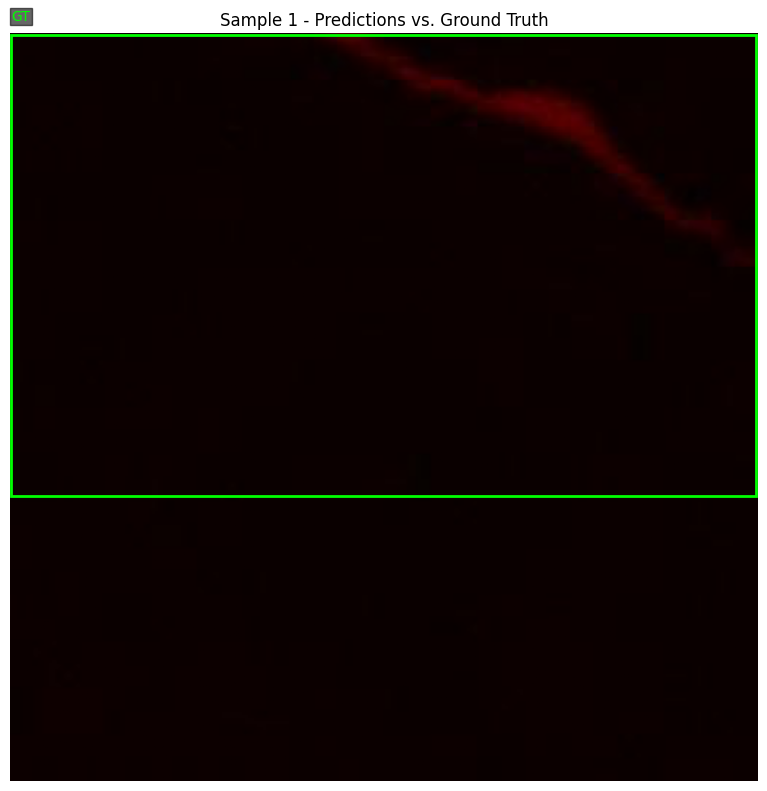

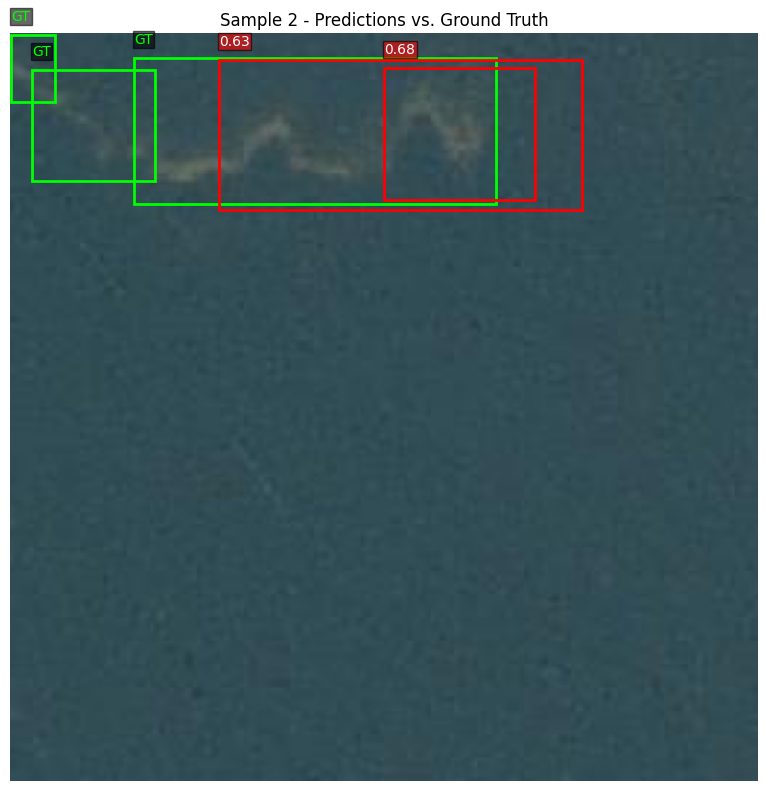

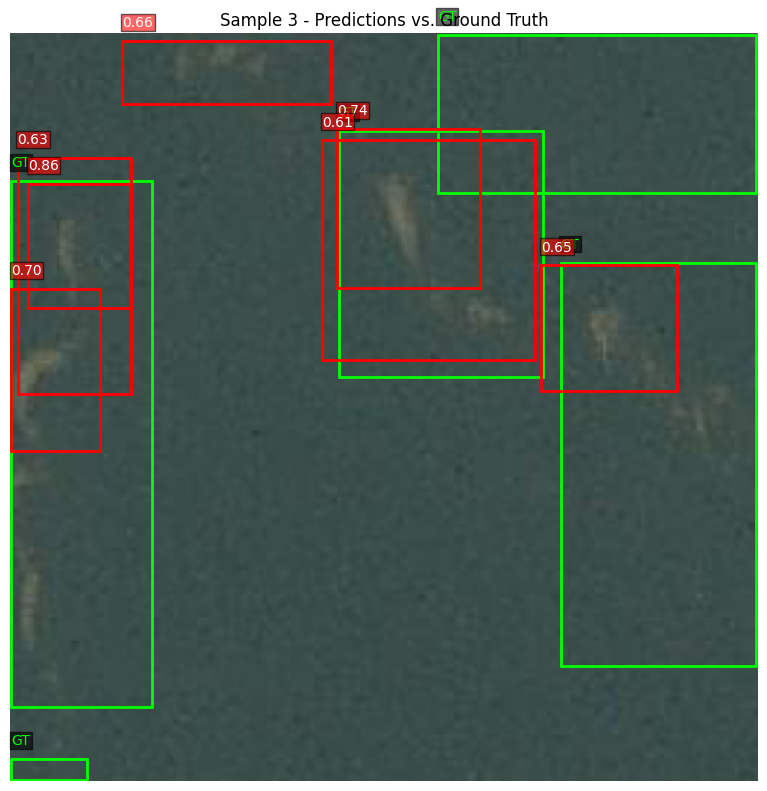

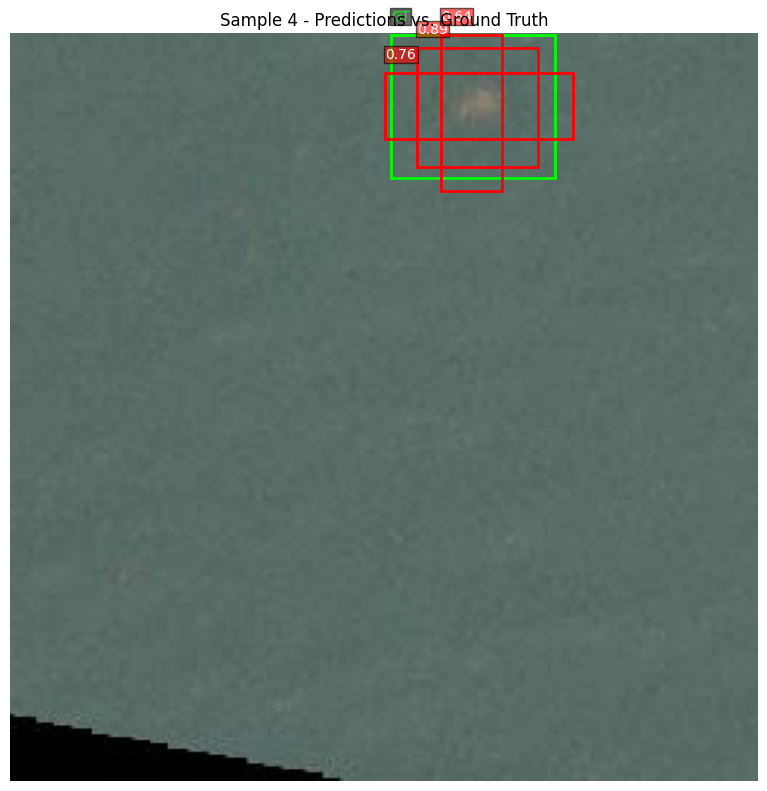

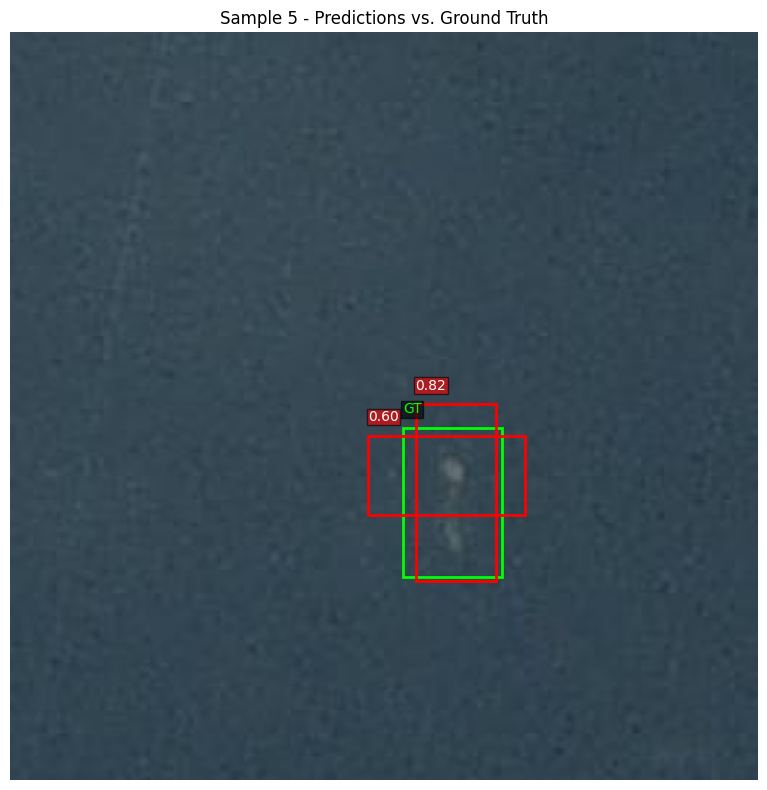

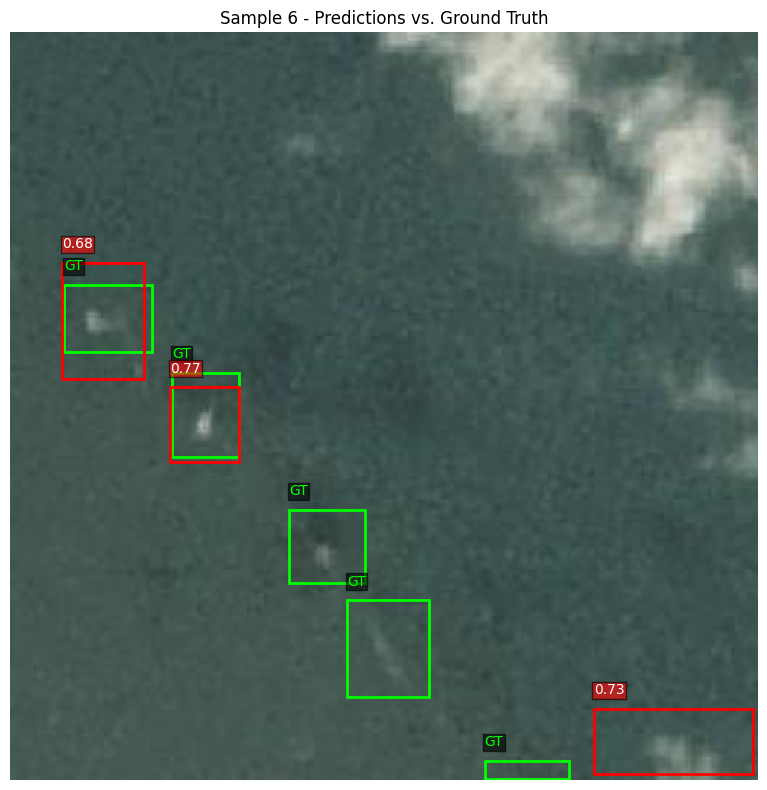

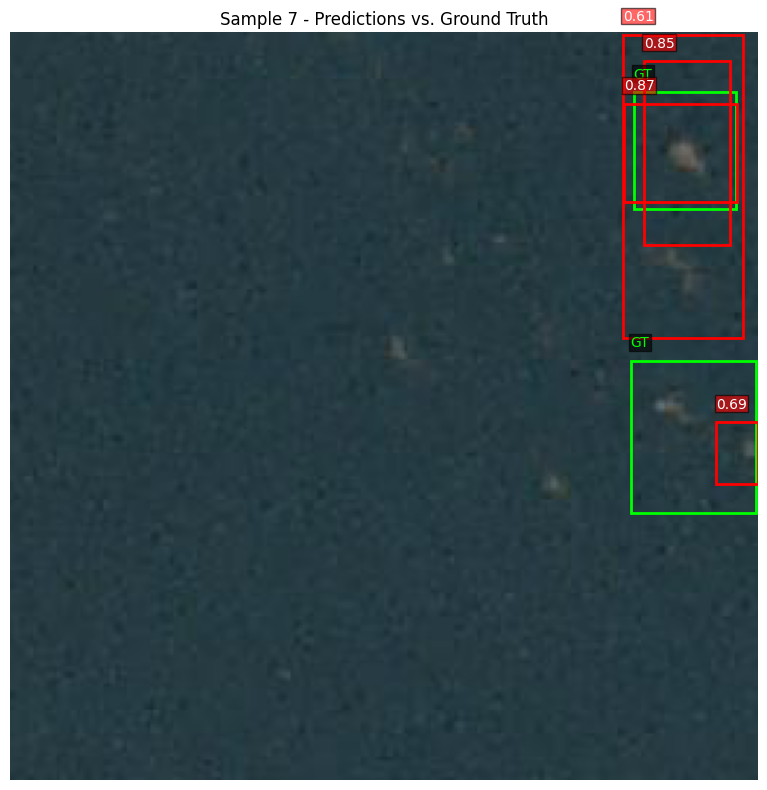

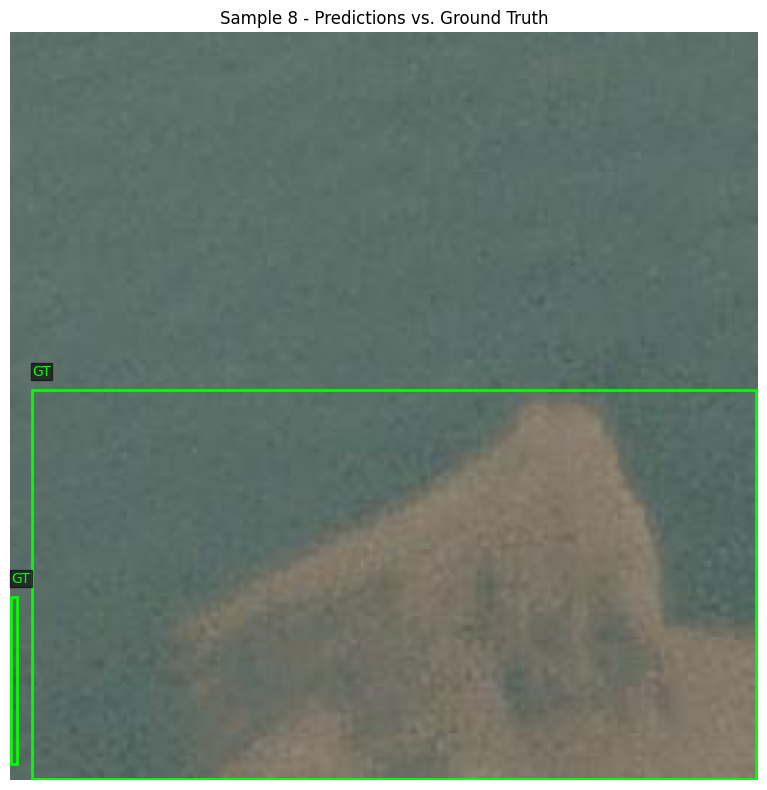

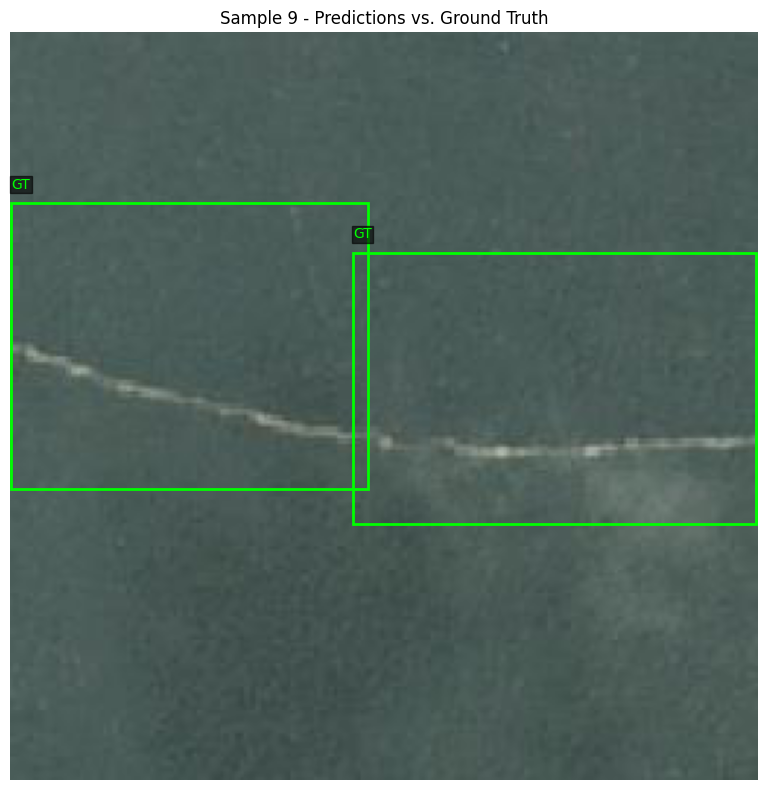

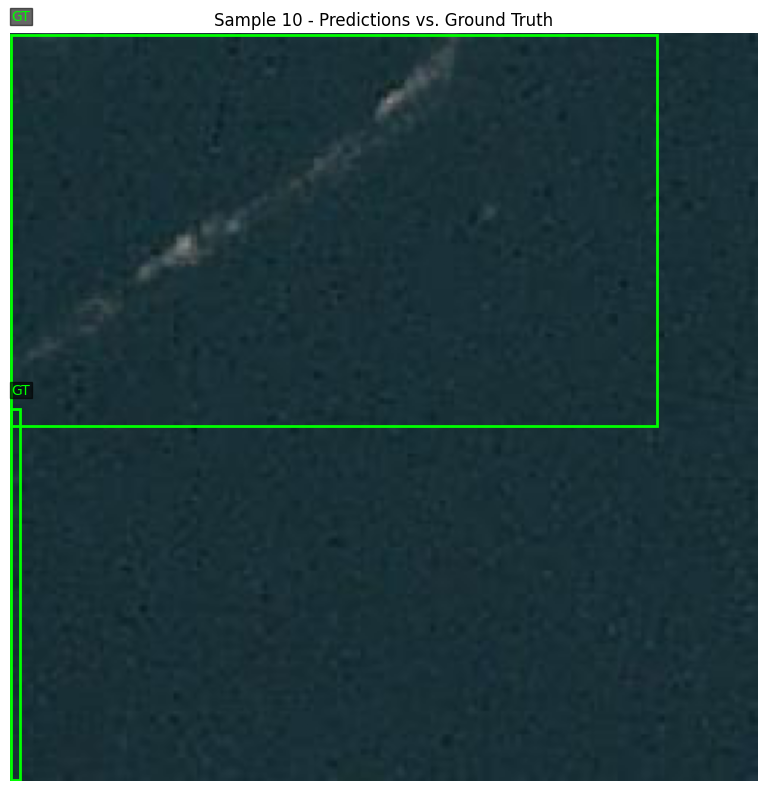

In [8]:
# %%
print("--- FINAL STEP: VISUALIZING PREDICTIONS VS. GROUND TRUTH ---")

# Get a single batch
test_loader = datamodule.test_dataloader()
batch = (next(iter(test_loader)))
images, gt_boxes = batch['image'], batch['boxes']

# Get model and move to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = task.model.to(device)
model.eval()

# --- THE CRUCIAL FIX FOR PREDICTION ---
# The model was trained on normalized images. We must provide the same format for inference.
# The standard torchvision transform expects input as a float tensor in the [0.0, 1.0] range.
# Our `images` tensor is currently a float in the [0, 255] range.
# We must scale it before passing it to the model.
images_for_model = [(img.float() / 255.0).to(device) for img in images]

# Get model predictions using the correctly scaled images
with torch.no_grad():
    predictions = model(images_for_model)


# Final, corrected visualization function
def plot_final_predictions(images_batch, gt_boxes_batch, predictions_batch):
    for i in range(min(len(images_batch), 10)):
        # For visualization, we also scale the original image tensor
        image_tensor = images_batch[i].cpu().float() / 255.0
        image_tensor = torch.clip(image_tensor, 0, 1)
        image_numpy = image_tensor.permute(1, 2, 0).numpy()
        
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        ax.imshow(image_numpy)
        ax.set_title(f"Sample {i+1} - Predictions vs. Ground Truth")
        ax.axis('off')

        # Plot Ground Truth (Green Boxes)
        for box in gt_boxes_batch[i]:
            xmin, ymin, xmax, ymax = box
            width, height = xmax - xmin, ymax - ymin
            rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor='lime', linewidth=2)
            ax.add_patch(rect)
            ax.text(xmin, ymin - 5, 'GT', color='lime', bbox=dict(facecolor='black', alpha=0.6, pad=1))

        # Plot Predictions (Red Boxes)
        for box, score in zip(predictions_batch[i]['boxes'].cpu(), predictions_batch[i]['scores'].cpu()):
            if score > 0.6:
                xmin, ymin, xmax, ymax = box
                width, height = xmax - xmin, ymax - ymin
                rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor='red', linewidth=2)
                ax.add_patch(rect)
                ax.text(xmin, ymin - 5, f'{score:.2f}', color='white', bbox=dict(facecolor='red', alpha=0.6, pad=1))
        
        plt.tight_layout()
        plt.show()

print("Displaying plots...")
print(" - GREEN boxes are the ground truth labels.")
print(" - RED boxes are the model's predictions with a confidence score > 0.5.")
plot_final_predictions(images, gt_boxes, predictions)

In [9]:
# %%
import os
print("--- FINAL STEP: SAVING THE TRAINED MODEL ---")

# Ensure the model is on the CPU and in evaluation mode before saving
model_to_save = task.model.cpu().eval()
output_dir = "saved_models"
os.makedirs(output_dir, exist_ok=True)

# --- Method 1: Save the State Dictionary (Recommended) ---
state_dict_path = os.path.join(output_dir, "marine_debris_detector_statedict_101.pt")
torch.save(model_to_save.state_dict(), state_dict_path)
print(f"Model state dictionary saved successfully to: {state_dict_path}")
print("  - To load: create a new model instance and use `model.load_state_dict(torch.load(PATH))`")


# --- Method 2: Save the Full Model Object ---
full_model_path = os.path.join(output_dir, "marine_debris_detector_full_model_101.pt")
torch.save(model_to_save, full_model_path)
print(f"Full model object saved successfully to: {full_model_path}")
print("  - To load: use `model = torch.load(PATH)`")

--- FINAL STEP: SAVING THE TRAINED MODEL ---
Model state dictionary saved successfully to: saved_models/marine_debris_detector_statedict_101.pt
  - To load: create a new model instance and use `model.load_state_dict(torch.load(PATH))`
Full model object saved successfully to: saved_models/marine_debris_detector_full_model_101.pt
  - To load: use `model = torch.load(PATH)`


In [10]:
# %%
print("\n--- EXPORTING MODEL TO ONNX FORMAT ---")

# Use the same model we prepared for saving
onnx_model = task.model.cpu().eval()
onnx_path = os.path.join(output_dir, "marine_debris_detector_101.onnx")

# Create a dummy input tensor with the correct shape and type
# The model expects a list of tensors, so we create a list with one tensor.
# The shape is [channels, height, width]
dummy_input = [torch.randn(1, 3, 256, 256, device="cpu")]

# The model's output (number of detected boxes) is dynamic. We need to specify this.
input_names = ["input_image", "targets"]
output_names = ["boxes", "labels", "scores"]

try:
    torch.onnx.export(
        onnx_model,
        (dummy_input, None),  # The comma is important to make it a tuple
        onnx_path,
        input_names=input_names,
        output_names=output_names,
        opset_version=20, # A commonly supported version
        # This part is crucial for object detection models
        dynamic_axes={
            'boxes': {0: 'num_detections'},
            'labels': {0: 'num_detections'},
            'scores': {0: 'num_detections'}
        }
    )
    print(f"\nModel exported successfully to ONNX format: {onnx_path}")
    
    # Optional: Verify the ONNX model
    # !pip install onnx onnxruntime
    import onnx
    onnx_model_check = onnx.load(onnx_path)
    onnx.checker.check_model(onnx_model_check)
    print("ONNX model checked and verified successfully.")

except Exception as e:
    print(f"\nAn error occurred during ONNX export: {e}")


--- EXPORTING MODEL TO ONNX FORMAT ---

An error occurred during ONNX export: images is expected to be a list of 3d tensors of shape [C, H, W], got torch.Size([1, 3, 256, 256])
